In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise: Thompson sampling for a 5-armed bandit with Gaussian rewards

In this exercise, you will derive a Thompson sampling algorithm for the 5-armed bandit problem with normally distributed rewards. We will use bandits with unit-variance reward distributions, so that $
R_t\mid A_t=k \thicksim N(\theta_k, 1)$.


In other words, if we take action $k$, where $k\in\{1,2,3,4,5\}$ at time $t$, then we will receive a reward drawn from a normal distribution with mean $\theta_k$ and variance 1.

Below, we will use the prior distribution $\mu_k\thicksim N(0, 1)$.

The first few questions will be mathematical derivations for parts of the sampling routine. Then, we will move on to simulating the bandit to see if it works!

## Deriving Thompson sampling

Question 1: Normal-normal posterior with known variances

Let $X\thicksim N(a, \sigma^2)$ be a normally distributed random variable with mean $a$ and variance $\sigma^2$. Let $Y$ be normally distributed with mean $X$ and variance $\tau^2$, i.e., $Y\mid X=x\thicksim N(x, \tau^2)$.

If we observe $Y=y$, what is the posterior distribution of $X$ given $Y=y$? Hint: use Bayes rule.

> Answer:

Using Bayes' theorem, the posterior is proportional to the product of the prior and likelihood:

$$
p(X \mid Y = y) \propto p(Y = y \mid X) \cdot p(X)
$$

$$
p(X \mid Y = y) \propto \exp\left( -\frac{(y - X)^2}{2\tau^2} \right) \cdot \exp\left( -\frac{(X - a)^2}{2\sigma^2} \right)
$$

$$
p(X \mid Y = y) \propto \exp\left( -\left[ \frac{(X - a)^2}{2\sigma^2} + \frac{(X - y)^2}{2\tau^2} \right] \right)
$$

$$
\frac{(X - a)^2}{2\sigma^2} + \frac{(X - y)^2}{2\tau^2} = \frac{X^2 - 2aX + a^2}{2\sigma^2} + \frac{X^2 - 2yX + y^2}{2\tau^2}
$$

$$
p(X \mid Y = y) \propto \exp\left( -\left[ X^2\left( \frac{1}{2\sigma^2} + \frac{1}{2\tau^2} \right) - X\left( \frac{a}{\sigma^2} + \frac{y}{\tau^2} \right) + \text{constants} \right] \right)
$$

$$
p(X \mid Y = y) \propto \exp\left( -\frac{\left( X - \mu_p \right)^2}{2\sigma_p^2} \right)
$$

$$
\mu_p = \frac{\dfrac{a}{\sigma^2} + \dfrac{y}{\tau^2}}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau^2}}, \quad \sigma_p^2 = \frac{1}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau^2}}
$$

The posterior distribution is:

$$
p(X \mid Y = y) = N\left( \mu_p, \sigma_p^2 \right)
$$

where:

$$
\mu_p = \frac{\dfrac{a}{\sigma^2} + \dfrac{y}{\tau^2}}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau^2}}, \quad \sigma_p^2 = \frac{1}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau^2}}
$$


Question 2: Updating the posterior in Thompson sampling

In Thompson sampling, after taking action $A_t=a_t$, we must update the posterior distribution for the bandit's $a_t$th arm. In this case, that means updating our posterior distribution for $\mu_k$.

 1. Say that at iteration $t-1$, our posterior distribution for $\mu_k$ is $N(m_k(t-1),s^2_k(t-1))$. What is the posterior distribution of $\mu_k$ at step $t$, after taking action $A_t=k$ and observing $R_t=r_t$? You should phrase your answer in terms of $m_k(t-1)$ and $s^2_k(t-1)$.
 2. What is the posterior distribution of $\mu_k$ after taking action $A_t=a_t$, where $a_t\neq k$?

Hint: use your answer from Question 1.

> Answer:

**Answer to Question 2:**


Using the result from **Question 1**, the posterior distribution is:
$$
\mu_k \mid R_t = r_t \sim N\left( m_k(t),\, s_k^2(t) \right)
$$
where:
$$
\begin{align*}
m_k(t) &= \frac{\dfrac{m_k(t-1)}{s_k^2(t-1)} + \dfrac{r_t}{1}}{\dfrac{1}{s_k^2(t-1)} + \dfrac{1}{1}} = \frac{m_k(t-1)/s_k^2(t-1) + r_t}{1/s_k^2(t-1) + 1} \\
s_k^2(t) &= \frac{1}{\dfrac{1}{s_k^2(t-1)} + \dfrac{1}{1}} = \frac{1}{1/s_k^2(t-1) + 1}
\end{align*}
$$



2. **When $( A_t = a_t \neq k )$:**
   $$
   \mu_k \sim N\left( m_k(t-1),\, s_k^2(t-1) \right)
   $$


Question 3: Selecting the play

In Thompson sampling, we select our ``play'' or action $A_t$ according to our posterior distribution: select $A_t=k$ with probability equal to our current (posterior) probability that $k$ is the best action.

Based on the Bernoulli example from lecture, derive a method for picking $A_t$, and show that it chooses $A_t=k$ with probability equal to $$P(\mu_k > \mu_i\text{ for all }i\neq k \mid R_1,\dots,R_{t-1},A_1,\dots,A_{t-1}).$$

> Answer:

- **Sampling:**
  - For each arm \( i \):
    $$
    \mu_i^{(t)} \sim N\left( m_i(t-1),\, s_i^2(t-1) \right)
    $$

- **Selection:**
  - Choose:
    $$
    A_t = \arg\max_{i} \mu_i^{(t)}
    $$

- **Probability of Selection:**
  - The probability that \( A_t = k \) is:
    $$
    P(A_t = k) = P\left( \mu_k > \mu_i \text{ for all } i \neq k \mid \text{data up to } t-1 \right)
    $$

  - This matches the desired probability:
    $$
    P\left( \mu_k \text{ is the best arm} \mid \text{data up to } t-1 \right)
    $$



## Simulation

## Reproducible random number generation in NumPy

First, a brief refresher on sampling random variables in NumPy. Of course, you have all done this before, but here is a tutorial in the best practice for reproducible random number generation using NumPy's latest tools. Here, "reproducible" means that the simulation will generate the same results across different runs, which is an important tool to have in your data science toolbox when you want to share results that others can replicate!

In [15]:
# here, we instantiate a random generator, which can be used
# to sample random variables
# this is a Generator object, see: https://numpy.org/doc/stable/reference/random/generator.html
# Notice that we set the seed here. This means that
# repeated runs of this notebook will have the same
# behavior.
rg = np.random.default_rng(0)

# to draw samples from a normal random variable with mean mu
# and standard deviation sigma, we can do it like so:
mu = 10
sigma = 2
sample = rg.normal(loc=mu, scale=sigma)
print("One sample:", sample)

# to draw multiple samples, we can use
samples = rg.normal(loc=mu, scale=sigma, size=5)
print("Five samples:", samples)

# if we want to sample from multiple means at once
# using a shared standard deviation, we can use:
mu_vec = [0, 5, 10]
sigma = 1
mu_samples = rg.normal(loc=mu_vec, scale=sigma)
print("Samples with 3 means:", mu_samples)
# notice that `mu_samples.shape == (3,)`!

One sample: 10.251460442186787
Five samples: [ 9.73579027 11.2808453  10.20980023  8.92866125 10.72319011]
Samples with 3 means: [1.30400005 5.94708096 9.29626476]


The most important thing to notice above is that the `scale` parameter is the standard deviation, not the variance!

Below, please use `rg` to draw your random numbers. The documentation for the `normal` function is here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

Question 4: coding up a bandit simulation

The following code stencil will help you to write a function which simulates the Thompson sampling algorithm derived in Questions 1-3.

In [16]:
# parameters
n_iter = 10000

# define the true parameters of the bandit
# this is the truth that we want to learn below!
mu = rg.normal(loc=0, scale=1, size=5)

# setup
# Initialize posterior parameters according to the prior
m_t = np.zeros(5)  # Prior mean (μ_0 = 0)
s2_t = np.ones(5)  # Prior variance (σ²_0 = 1)

# bandit loop
rewards = []
regrets = []
for t in range(n_iter):
    # 4.a -- pick an action
    # Sample from current posterior for each arm
    samples = rg.normal(loc=m_t, scale=np.sqrt(s2_t))
    # Choose arm with highest sampled value
    a_t = np.argmax(samples)
    
    # 4.b -- get a reward
    # Sample r_t from the bandit arm corresponding to action a_t
    r_t = rg.normal(loc=mu[a_t], scale=1)
    
    # 4.c -- update posterior
    # Only update the posterior for the chosen arm
    # Using the formulas derived in Question 2
    s2_t_new = 1 / (1/s2_t[a_t] + 1)
    m_t_new = s2_t_new * (m_t[a_t]/s2_t[a_t] + r_t)
    
    # Update the parameters
    s2_t[a_t] = s2_t_new
    m_t[a_t] = m_t_new
    
    # 4.d -- compute regret
    # Regret is difference between optimal reward and received reward
    regret = np.max(mu) - mu[a_t]
    
    # -- track performance
    rewards.append(r_t)
    regrets.append(regret)

Question 5: Plotting the results

(5.a): Plot the average reward $\frac{1}{t}\sum_{i=1}^t r_t$ as a function of $t$

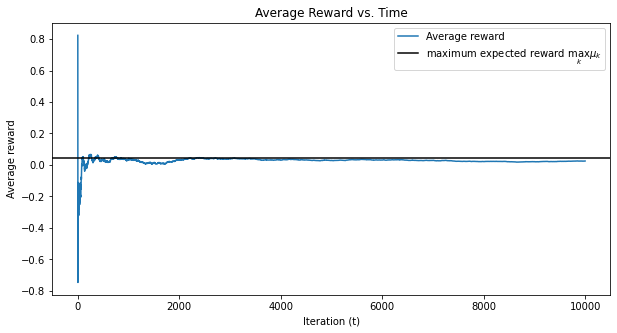

In [17]:
# 5.a: your code here
# plot the average reward
cumsum_rewards = np.cumsum(rewards)
t = np.arange(1, n_iter + 1)
avg_rewards = cumsum_rewards / t

plt.figure(figsize=(10, 5))
plt.plot(t, avg_rewards, label='Average reward')
plt.axhline(mu.max(), color="k", label="maximum expected reward $\\max_k\\mu_k$")
plt.xlabel('Iteration (t)')
plt.ylabel('Average reward')
plt.title('Average Reward vs. Time')
plt.legend()

(5.b) Plot the regret using a logarithmic horizontal axis

In the lecture, it was mentioned that Thompson sampling asymptotically achieves logarithmic total regret. So, if we plot the total regret using a logarithmic horizontal axis, we should expect to see something that *eventually* looks linear (it won't necessarily at the beginning).

Recall, the total regret is the running sum of the regrets at each iteration.

Hint: the function `plt.semilogx()` could help! https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html

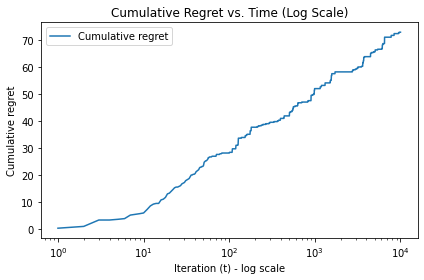

In [18]:
# Your code here
cumsum_regrets = np.cumsum(regrets)
plt.semilogx(t, cumsum_regrets, label='Cumulative regret')
plt.xlabel('Iteration (t) - log scale')
plt.ylabel('Cumulative regret')
plt.title('Cumulative Regret vs. Time (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()

# Second Part: Gradient bandit

In this exercise, you would implement the gradient bandit algorithm for multi-armed bandit problem. We would use the same problem setup as in the thompson sampling problem.

Instead of learning the value function, the gradient bandit method directly learns the __policy__ $\pi$, which is a distribution over all possible actions. In the multi-armed bandit case, the policy is defined through the preference function $H$ as follows:

$$\pi_H(a) \triangleq Pr(Action = a|H) = \frac{e^{H(a)}}{\sum_{b=1}^k e^{H(b)}} \qquad  (1)$$

One key observation is that the preference function $H(a)$ is exactly the _logits_ we've seen in previous exercise. In this case, the higher $H(a)$ is relatively to other $H(a')$, the action $a$ is more __preferred__ than other actions $a'$, hence the name __preference__.

## Step 1. The logsumexp trick

Directly computing the probability using eq (1) can result in under- or overflow when exponentiating large values.
The `logsumexp` trick is a numerically stable way to compute the probability given in eq (1):

$$\pi_H(a)= \frac{e^{H(a)}}{\sum_{b=1}^k e^{H(b)}} = \frac{e^{H(a) - c}}{\sum_{b=1}^k e^{H(b)-c}}$$
where $c = \max_{b=1}^k e^{H(b)}$.

### Question 1

Implement the function below that computes the probability (i.e. policy) from the logits (i.e. preference) using the `logsumexp` trick.

You may use the `scipy.sepcial.logsumexp` function imported below (or not).

In [19]:
from scipy.special import logsumexp

In [20]:
def get_probs(logits):
    ### you code here###
    # expected: 1-3 lines of codes
    exp_logits = logits - logsumexp(logits)
    probs = np.exp(exp_logits)
    return probs

## Step 2. Deriving the gradient bandit

We would first describe the general policy gradient method, and then discuss its application to the multi-armed bandit problem.

The goal of the policy gradient method is to optimize the policy $\pi_H$ such that the expected reward is maximized, i.e. the optimal $\pi^*$ is such that

$$\pi^* = \arg\max_\pi \mathbb{E}_{\pi(a)} [R(a)]  \qquad (2)$$

### Step 2.1 The REINFORCE trick: a general policy gradient method
Suppose the policy $\pi$ is parameterized by $\theta$. The optimization problem (2) is equivalent to the following

$$\theta^* = \arg \max_\theta  \mathbb{E}_{\pi_\theta(a)} [R(a)] \qquad (3)$$

To solve this optimization problem, we could use gradient ascent algorithm. Let's first compute the gradient of the expected reward:

$$\nabla_\theta \mathbb{E}_{\pi_\theta (a)} [R(a)] = \nabla_\theta \int \pi_\theta (a) R(a)da $$

To compute this gradient exactly, we would need to integrate over all possible actions (the action space could be inifitely-dimensional, or finite-dimension as in the multi-armed bandit problem in which case the integration becomes a summation, but the dimensions could stil be high). We would like to avoid this integration. The REINFORCE trick shows that
$$\nabla_\theta \mathbb{E}_{\pi_\theta (a)} [R(a)] = \mathbb{E}_{\pi_\theta (a)} [R(a) \nabla_\theta \log \pi_\theta(a)] \qquad (5)$$

The implication is that we could obtain a stochastic estimate, and then apply stochastic gradient ascent. That is, randomly sample an action $a$ from $\pi_\theta$, and then obtain a stochastic gradient $R(a) \nabla_\theta \log \pi_\theta(a)$, which is an unbiased estimate of the true exact gradient $\nabla_\theta \mathbb{E}_{\pi_\theta (a)} [R(a)]$.


### Question 2: Prove the REINFORCE trick eq (5).

Hint: Use $\frac{d}{dx} \log f(x) = \frac{1}{f(x)} \frac{d f(x)}{dx}$.

### YOUR ANSWER HERE ###

The expected reward under the policy \(\pi_\theta(a)\) is:

$$
J(\theta) = \mathbb{E}_{\pi_\theta(a)} [R(a)] = \int \pi_\theta(a) R(a) \, da.
$$

Taking the gradient of \(J(\theta)\) with respect to \(\theta\):

$$
\nabla_\theta J(\theta) = \nabla_\theta \int \pi_\theta(a) R(a) \, da.
$$

Since \(R(a)\) does not depend on \(\theta\), we can move it outside the gradient:

$$
\nabla_\theta J(\theta) = \int R(a) \nabla_\theta \pi_\theta(a) \, da.
$$

Using the identity:

$$
\nabla_\theta \log \pi_\theta(a) = \frac{1}{\pi_\theta(a)} \nabla_\theta \pi_\theta(a),
$$

$$
\nabla_\theta \pi_\theta(a) = \pi_\theta(a) \nabla_\theta \log \pi_\theta(a).
$$

Substitute \(\nabla_\theta \pi_\theta(a)\) into the gradient of \(J(\theta)\):

$$
\nabla_\theta J(\theta) = \int R(a) \pi_\theta(a) \nabla_\theta \log \pi_\theta(a) \, da.
$$


The integral now represents an expectation over the policy \(\pi_\theta(a)\):

$$
\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta(a)} [R(a) \nabla_\theta \log \pi_\theta(a)].
$$


We have shown that:

$$
\nabla_\theta \mathbb{E}_{\pi_\theta (a)} [R(a)] = \mathbb{E}_{\pi_\theta (a)} [R(a) \nabla_\theta \log \pi_\theta(a)],
$$

which proves the REINFORCE trick.


### Introducing the baseline

Despite the REINFORCEMENT trick is computationally favorable, it also comes with high variance. One way to reduce the variance of the stochastic gradient estimate is to introduce a baseline $B$ which does not depend on the action: instead of using $R(a) \nabla_\theta \log \pi_\theta(a)$ as the stochastic gradient estimate, we use $(R(a) - B) \nabla_\theta \log \pi_\theta(a)$.

### Question 3

To justify the use of baseline, we need to make sure the new gradient estimate is also unbiased, i.e. show the following

$$  \mathbb{E}_{\pi_\theta (a)} [R(a) \nabla_\theta \log \pi_\theta(a)]  = \mathbb{E}_{\pi_\theta (a)} [(R(a)  - B ) \nabla_\theta \log \pi_\theta(a)]  \qquad (6) $$

Hint: (1) Use $\frac{d}{dx} \log f(x) = \frac{1}{f(x)} \frac{d f(x)}{dx}$, (2) exchange gradient with the integral, and (3) remember any probability distribution $\pi_\theta $ integrates to 1.

### YOUR ANSWER HERE ###

#### Proof:

Consider the difference between the left-hand side (LHS) and the right-hand side (RHS):

$$
\text{LHS} - \text{RHS} = \mathbb{E}_{\pi_\theta(a)} [R(a) \nabla_\theta \log \pi_\theta(a)] - \mathbb{E}_{\pi_\theta(a)} \left[ \left( R(a) - B \right) \nabla_\theta \log \pi_\theta(a) \right].
$$

Simplify the expression:

$$
\text{LHS} - \text{RHS} = \mathbb{E}_{\pi_\theta(a)} \left[ R(a) \nabla_\theta \log \pi_\theta(a) - \left( R(a) - B \right) \nabla_\theta \log \pi_\theta(a) \right].
$$

$$
\text{LHS} - \text{RHS} = \mathbb{E}_{\pi_\theta(a)} \left[ \left( R(a) - (R(a) - B) \right) \nabla_\theta \log \pi_\theta(a) \right].
$$

$$
\text{LHS} - \text{RHS} = \mathbb{E}_{\pi_\theta(a)} \left[ B \nabla_\theta \log \pi_\theta(a) \right].
$$


Since \( B \) does not depend on the action \( a \), it can be factored out of the expectation:

$$
\text{LHS} - \text{RHS} = B \cdot \mathbb{E}_{\pi_\theta(a)} \left[ \nabla_\theta \log \pi_\theta(a) \right].
$$

We now prove that:

$$
\mathbb{E}_{\pi_\theta(a)} \left[ \nabla_\theta \log \pi_\theta(a) \right] = 0.
$$


$$
\mathbb{E}_{\pi_\theta(a)} \left[ \nabla_\theta \log \pi_\theta(a) \right] = \int \pi_\theta(a) \nabla_\theta \log \pi_\theta(a) \, da.
$$

Using the identity $\pi_\theta(a) \nabla_\theta \log \pi_\theta(a) = \nabla_\theta \big(\pi_\theta(a)\big)$

$$
\int \pi_\theta(a) \nabla_\theta \log \pi_\theta(a) \, da = \int \nabla_\theta \pi_\theta(a) \, da.
$$

$$
\int \nabla_\theta \pi_\theta(a) \, da = \nabla_\theta \int \pi_\theta(a) \, da.
$$

Since $\pi_\theta(a)$ is a probability distribution over  $\alpha$, it integrates to 1:

$$
\int \pi_\theta(a) \, da = 1.
$$

$$
\nabla_\theta \int \pi_\theta(a) \, da = \nabla_\theta 1 = 0.
$$

Thus:

$$
\mathbb{E}_{\pi_\theta(a)} \left[ \nabla_\theta \log \pi_\theta(a) \right] = 0.
$$

Returning to the difference between the LHS and RHS:

$$
\text{LHS} - \text{RHS} = B \cdot \mathbb{E}_{\pi_\theta(a)} \left[ \nabla_\theta \log \pi_\theta(a) \right] = B \cdot 0 = 0.
$$

Since the difference between the LHS and RHS is zero:

$$
\text{LHS} - \text{RHS} = 0 \implies \text{LHS} = \text{RHS}.
$$

We have shown that:

$$
\mathbb{E}_{\pi_\theta(a)} [R(a) \nabla_\theta \log \pi_\theta(a)] = \mathbb{E}_{\pi_\theta(a)} \left[ \left( R(a) - B \right) \nabla_\theta \log \pi_\theta(a) \right].
$$


### Step 2.2 Applying to the multi-armed bandit problem.

Let's get back to the multi-armed bandit setting. In this case, the policy $\pi$ is parameterized by the preference vector $H$, i.e. $\pi = \pi_H$. The task is this step is to compute the gradient.

In principle, we could use any autodiff method we've learned before to automatically compute $\nabla_H \log \pi_H$. However, we would work out the analytical expression for multi-armed bandit this time.

### Question 4
Show that

$$\frac{\partial \log \pi_H (A)}{\partial H(a)} = \mathbb{1}\{A=a\} - \pi_H(a)\qquad (7)$$
where we recall that $\pi_H$ is computed using $H$ in eq (1).

### YOUR ANSWER HERE ###

we start by recalling the definition of the policy $\pi_H(a)\$ in terms of the preference vector H:

$$
\pi_H(a) = \frac{e^{H(a)}}{\sum_{b=1}^k e^{H(b)}}.
$$

The logarithm of the policy for action A is:

$$
\log \pi_H(A) = H(A) - \log \left( \sum_{b=1}^k e^{H(b)} \right).
$$

Differentiate $\log \pi_H(A)$ with respect to H(a):

$$
\frac{\partial}{\partial H(a)} \log \pi_H(A) = \frac{\partial}{\partial H(a)} \left[ H(A) - \log \left( \sum_{b=1}^k e^{H(b)} \right) \right].
$$

- **First Term H(A)**:

  $$ 
  \frac{\partial H(A)}{\partial H(a)} = \begin{cases}
  1, & \text{if } a = A \\
  0, & \text{if } a \ne A
  \end{cases} = \mathbb{1}\{A = a\}.
  $$

- **Second Term :

  Let \(Z = \sum_{b=1}^k e^{H(b)}\). Then:

  $$
  \frac{\partial}{\partial H(a)} \left( -\log Z \right) = -\frac{1}{Z} \frac{\partial Z}{\partial H(a)} = -\frac{1}{Z} e^{H(a)} = -\frac{e^{H(a)}}{\sum_{b=1}^k e^{H(b)}} = -\pi_H(a).
  $$

Combining the two derivatives:

$$
\frac{\partial}{\partial H(a)} \log \pi_H(A) = \mathbb{1}\{A = a\} - \pi_H(a).
$$


### Step 2.3 Instantiating the gradient ascent rule

Having derived the gradient estimate, we can now write down the update rule for the preference parameter using the gradient ascent method:

$$H_{t+1}(a) \leftarrow H_t(A_t) + \alpha (R_t - B_t) (\mathbb{1} \{A_t = a\} -\pi_t(a)), \forall a  \qquad (8)$$

where $A_t, R_t, B_t$ are the action, reward and baseline at iteration $t$, and $\alpha$ is the learning rate.  

### Step 3. Implement the gradiant bandit.

### Question 5

In the following code, implement the gradient bandit problem. Use the average reward $\bar R_t$ as baseline. More specifically, when $t=0$, set $\bar R_t = 0$. When $t \geq 1$, set $\bar R_t =\frac{1}{t} \sum_{i=0}^{t-1} R_i$.

In [21]:
def gradient_bandit(n_iter, H_init, alpha, use_baseline=False):
    H_t = H_init
    K = H_init.shape[0]

    rewards = []
    regrets = []
    actions = []
    Hs = []

    baseline = 0

    # Define the true parameters of the bandit
    mu = rg.normal(loc=0, scale=1, size=K)
    
    for t in range(n_iter):
        # 5.a
        # compute the policy and then sample an action from the policy
        ### YOUR CODE HERE####
        # expected two lines of codes
        pi_t = get_probs(H_t)
        a_t = rg.choice(K, p=pi_t)
        ######################
        actions.append(a_t)

        if use_baseline and t >= 1:
          # 5.b
          # update the baseline
          ### YOUR CODE HERE ###
          # expected 1 line of code
          baseline = np.mean(rewards)
          ######################

        # 5.c
        # get a reward
        # Sample r_t from the bandit arm corresponding to the action a_t
        ### YOUR CODE HERE ###
        r_t = rg.normal(loc=mu[a_t], scale=1)
        ######################

        # 5.d
        # update policy
        ### YOUR CODE HERE ###
        # expected 3-6 lines of codes
        for a in range(K):
            grad = (1 if a == a_t else 0) - pi_t[a] 
            H_t[a] += alpha * (r_t - baseline) * grad  
        
        ######################
        Hs.append(H_t)

        # 5.e
        # -- compute regret
        # Compute the regret from the previous iteration, and assign it
        # to the variable `regret`
        ### Your code here ###
        regret = mu.max() - mu[a_t]
        ######################

        # -- track performance
        # Let's keep track of the reward received at each iteration
        # so that we can plot it below.
        rewards.append(r_t)
        regrets.append(regret)

    return H_t, pi_t, rewards, regrets, actions

In [22]:
n_iter = 1000
alpha  = 0.1
H_nobaseline, pi_nobaseline, rewards_nobaseline, regrets_nobaseline, actions_nobaseline = gradient_bandit(n_iter, np.zeros(5), alpha, use_baseline=False)
H_baseline, pi_baseline, rewards_baseline, regrets_baseline, actions_baseline = gradient_bandit(n_iter, np.zeros(5), alpha, use_baseline=True)

You can view the final policies as below.

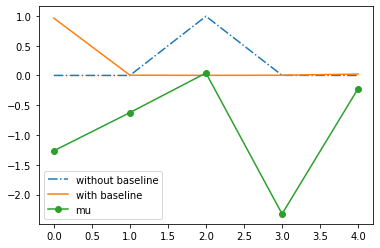

In [23]:
plt.plot(pi_nobaseline,'-.', label='without baseline')
plt.plot(pi_baseline,'-', label='with baseline')
plt.plot(mu, '-o', label='mu')
plt.legend()

### Question 6

Plotting the results as you did for thompson sampling problem.

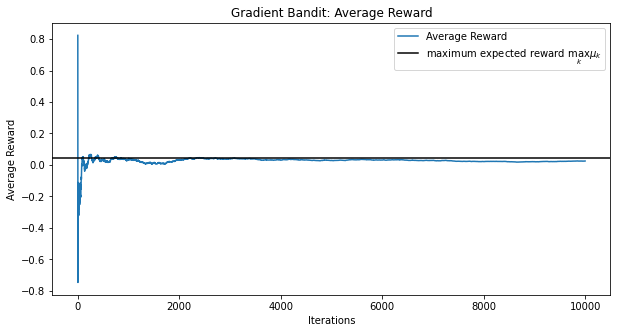

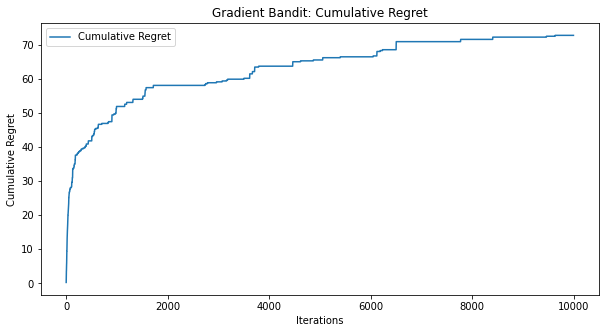

In [25]:
### YOUR CODE HERE ###

# 6.a: plot the average reward
average_rewards = np.cumsum(rewards) / np.arange(1, len(rewards) + 1) 
plt.figure(figsize=(10, 5))
plt.plot(average_rewards, label="Average Reward")
plt.axhline(mu.max(), color="k", label="maximum expected reward $\\max_k\\mu_k$")
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Gradient Bandit: Average Reward")
plt.legend()
plt.show()

# 6.b plot the cumulative regrets

cumulative_regrets = np.cumsum(regrets) 
plt.figure(figsize=(10, 5))
plt.plot(cumulative_regrets, label="Cumulative Regret")
plt.xlabel("Iterations")
plt.ylabel("Cumulative Regret")
plt.title("Gradient Bandit: Cumulative Regret")
plt.legend()
plt.show()